In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Préparation des données

On lit la table + premier apercu 

In [41]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


 # Apercu de la problématique

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :

- CUSTID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases (
- BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFFPURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTSPURCHASES : Amount of purchase done in installment
- CASHADVANCE : Cash in advance given by the user
- PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX : Numbe of purchase transactions made
- CREDITLIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

# Problématique : quels types de classification pour segmenter au mieux les clients de la base selon leurs cartes de crédit ? 
Au choix parmi 3 méthodes : K_means / GMM / Dendogramme 

In [42]:
df.shape

(8950, 18)

Informations générales et traitement des valeurs manquantes par moyenne 

On note des valeurs manquantes sur les variables CREDIT_LIMIT et MINIMUM_PAYMENTS

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

# Traitement des valeurs manquantes

Plusieurs solutions : ne pas les traiter / remplacer par la moyenne / supprimer ces NA / supprimer la variable / 
faire modèle 2 fois (avec traitement et sans)

On choisit de remplacer par la moyenne

In [44]:
df['MINIMUM_PAYMENTS'].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [45]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)

In [46]:
df['CREDIT_LIMIT'].describe()

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

In [47]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace=True)

In [48]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Description générale pour chaque variables après traitement des données

In [49]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Matrice Corrélation

Description des variables + ou - corrélées entre elles

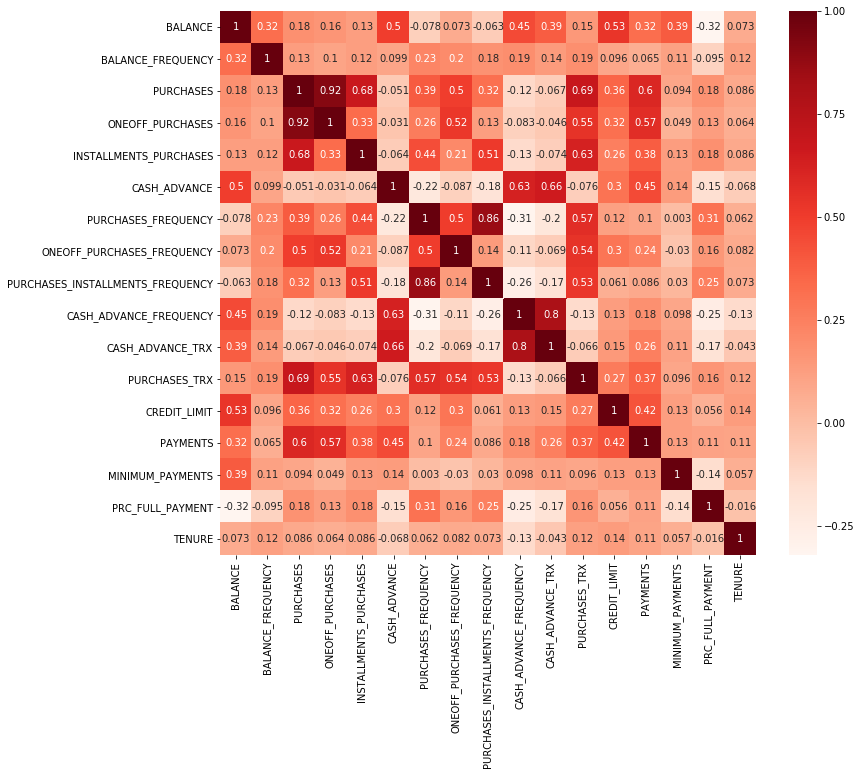

In [50]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Standardisation et Normalisation de la base

On est dans une situation de grande dimension clustering, grandes disparités entres les variables, 
certaines sont situées entre 0 et 1 d'autres supérieurs à 1000 etc etc donc on standardise la base
On donne à chaque variables de la base une valeur comprise entre -1 et 1 

de fait on a une échelle commune pour les 18 variables

In [51]:
from scipy import stats

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,normalize


from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D

 Drop de la variable CUST_ID pcq vraiment inutile (un CUST_ID = un numéro client) pour analyser qqch

In [52]:
data_label = df['CUST_ID']

df.drop('CUST_ID', axis = 1 , inplace=True)

Standardisation de la base

In [53]:
standardisation = StandardScaler()

standardisation.fit(df)

stand_X = standardisation.transform(df)

stand_data = pd.DataFrame(stand_X, columns=df.columns)

stand_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-5.366135e-16,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


Normalisation de la base

In [54]:
normalisation=normalize(stand_data)

normalisation_df=pd.DataFrame(normalisation)

normalisation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.311938,-0.106297,-0.181072,-0.152108,-0.148760,-0.198921,-0.343687,-0.289212,-0.301422,-0.287801,-0.202878,-0.217905,-0.409290,-0.225425,-1.325192e-01,-0.223964,0.153704
1,0.219925,0.037539,-0.131222,-0.099749,-0.127037,0.728166,-0.341434,-0.189660,-0.256265,0.160401,0.030761,-0.165384,0.192448,0.228779,2.495877e-02,0.065457,0.100796
2,0.126682,0.146783,-0.030504,0.030850,-0.128790,-0.132249,0.359771,0.757440,-0.259802,-0.191339,-0.134880,-0.030888,0.234039,-0.108739,-2.880315e-02,-0.148899,0.102187
3,0.020589,-0.426439,0.097309,0.229034,-0.190618,-0.154587,-0.425253,-0.167447,-0.384524,-0.108570,-0.138184,-0.231288,0.346393,-0.251048,-2.250182e-16,-0.220379,0.151244
4,-0.151595,0.218909,-0.195238,-0.146744,-0.192075,-0.197234,-0.428504,-0.168727,-0.387463,-0.285359,-0.201157,-0.233056,-0.382591,-0.153959,-1.123064e-01,-0.222064,0.152400


# Implémentation modèle des K-means

In [55]:
cluster_rg = range(1,15)
cluster_errors=[]
for i in cluster_rg:
    clusters=KMeans(i)
    clusters.fit(stand_data)
    labels=clusters.labels_
    centroids=clusters.cluster_centers_,3
    cluster_errors.append(clusters.inertia_)
clusters_df=pd.DataFrame({'Nbre_Clusters':cluster_rg,'Erreurs_Clusters':cluster_errors})
clusters_df

,Nbre_Clusters,Erreurs_Clusters
0,1,152150.000000
1,2,127784.849561
2,3,111986.176087
3,4,99073.938268
4,5,91502.377237
5,6,84850.981658
6,7,79532.316595
7,8,74491.132623
8,9,69875.785288
9,10,66478.970629


Interprétation des chiffres + comment sélectionner bon nbre de clusters ? 

Choix par méthode du coude = plus à vue d'oeil

On peut aussi utiliser la métrique du silhouette score : le score silhouette le plus faible sur l'ensemble des clusters
testé correspond au 'bon' cluster

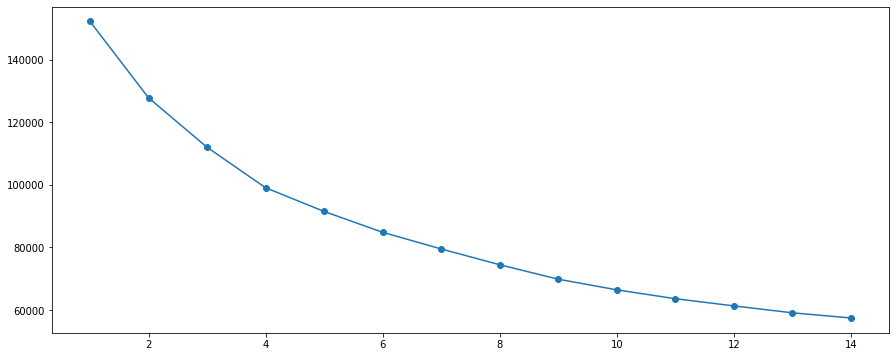

In [56]:
f,ax=plt.subplots(figsize=(15,6))
plt.plot(clusters_df.Nbre_Clusters,clusters_df.Erreurs_Clusters,marker='o')
plt.show()

On voit que la courbe fléchit à peu près à la valeur 4 donc on sélectionn 4 clusters pour la méthode des k_means

In [57]:
kmean= KMeans(4)
kmean.fit(stand_data)
labels=kmean.labels_

In [58]:
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


Répartition des clusters pour chaques variables de la base, on voit donc répartition des habitudes pour les clients 1ère forme de segmentation de la base

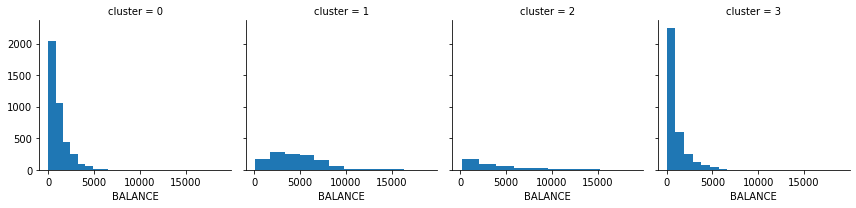

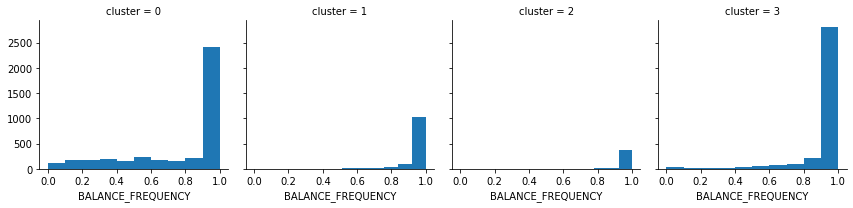

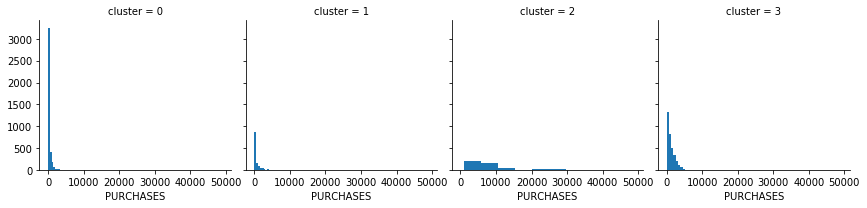

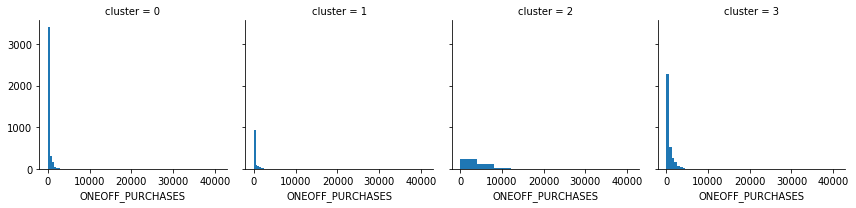

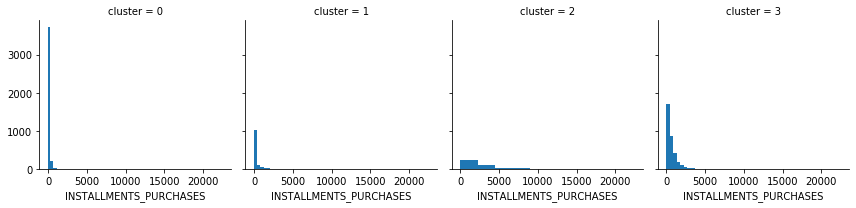

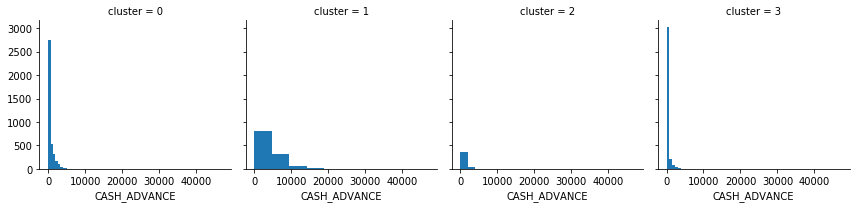

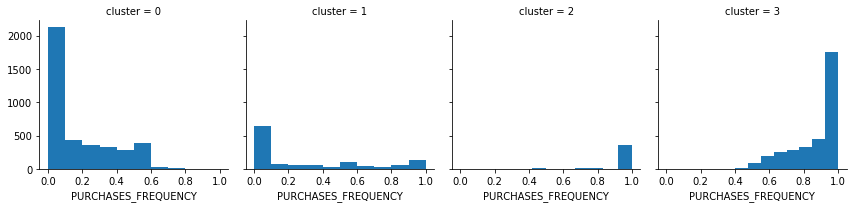

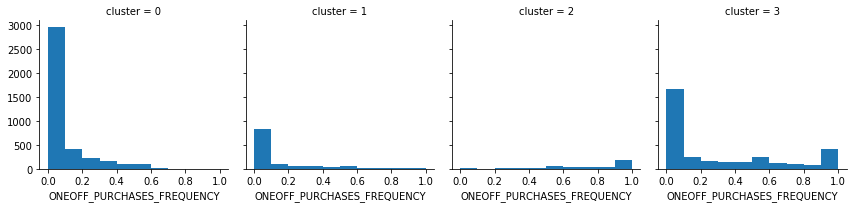

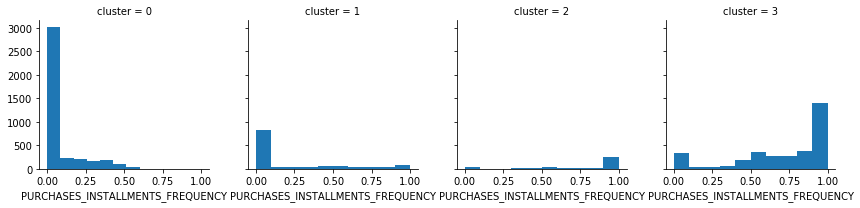

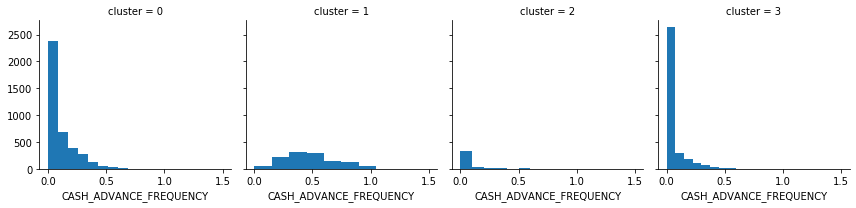

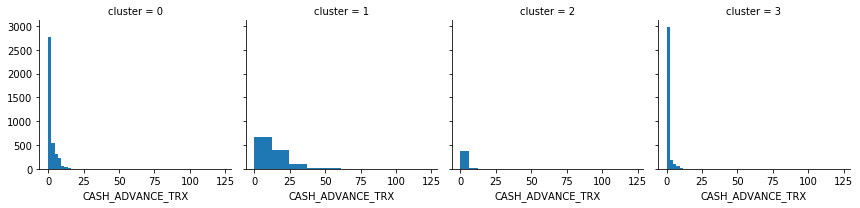

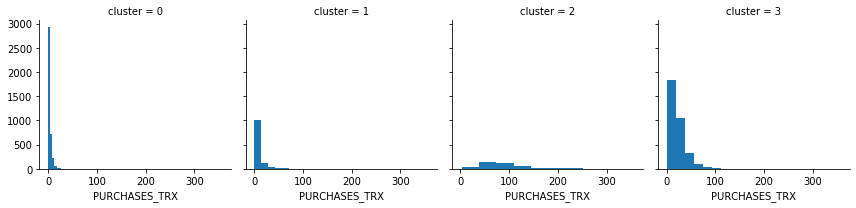

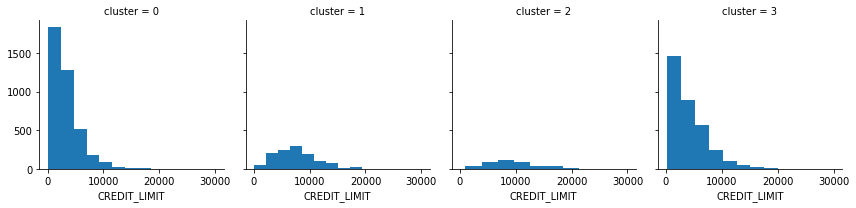

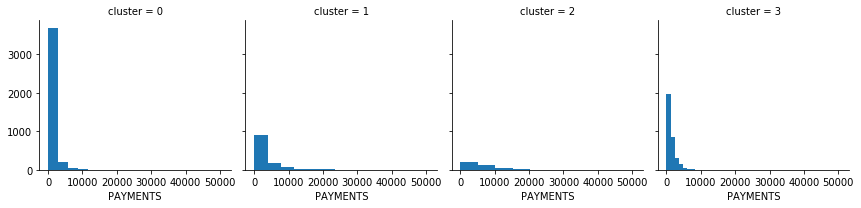

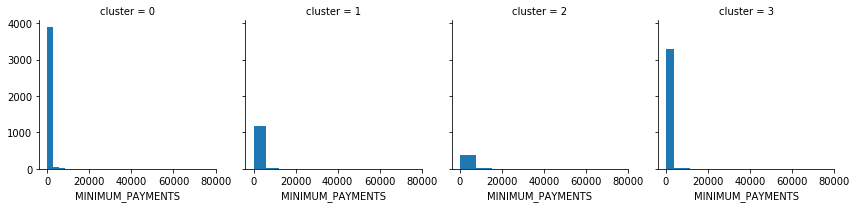

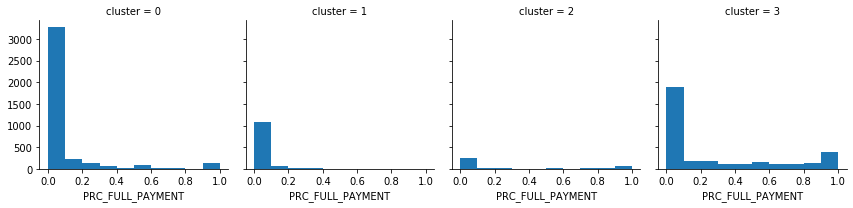

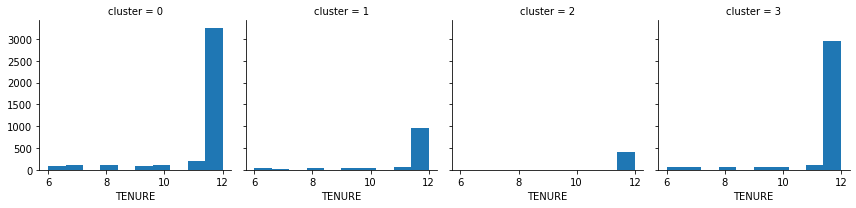

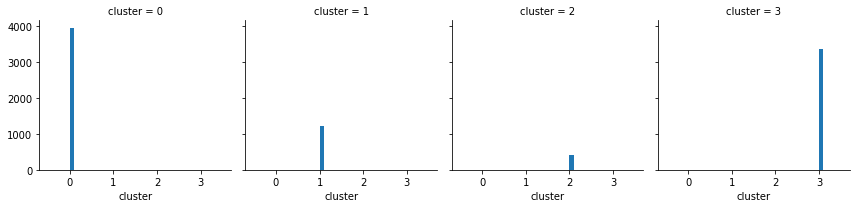

In [59]:
for CL in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, CL)

# Apercu Statistique des clusters selon les k-means

In [60]:
df['Clusters']=list(labels)
clients_kmeans=pd.DataFrame(df['Clusters'].value_counts()).rename(columns={'Clusters':'Nbre_de_Clients'})
clients_kmeans.T

,0,3,1,2
Nbre_de_Clients,3965,3364,1211,410


Moyenne des 4 clusters pour chaques variables

avec les graphiques au dessus on peut interpréter habitudes de consommation et désigner chaque clusters par un nom 

In [61]:
clusters.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,1005.787273,0.789087,270.764111,210.336739,60.695135,589.660686,0.170849,0.086436,0.081096,0.113817,2.096343,2.917024,3275.194901,970.853273,584.755152,0.078313,11.447415
1,4577.199684,0.968513,491.071544,311.745004,179.410495,4485.847516,0.284436,0.136892,0.183111,0.483006,14.215524,7.530966,7499.962465,3455.052828,1995.669235,0.034898,11.385632
2,3556.148177,0.986911,7680.432073,5099.738293,2582.157195,686.680975,0.946548,0.739667,0.788577,0.073149,2.170732,89.309756,9711.097561,7301.419079,1977.054411,0.286211,11.951220
3,895.687753,0.935000,1237.050764,594.504578,642.820645,210.758411,0.885459,0.297335,0.711981,0.042611,0.790725,22.101665,4213.784261,1333.101501,650.638117,0.269212,11.594233



Cluster 0 : Jeunes 

Faible balance mais souvent modifiée donc forte utilisation de la carte (hausse des transactions)
Nbre achats assez hétérogène et achats fait en une fois - faible utilisation du cash

Cluster 1 : Retraités / Personnes âgées

Forte balance (plus d'argent que le cluster 0) mais peu de mouvement sur le compte (baisse des transactions)
Fréquence des achats faibles - bref tout le contraire du cluster 0 sur les jeunes

Cluster 2 : Commerce / achat en gros

Compte très haut, changement fréquent 
Ensemble des achats fait par cahs in advance mais fréquence des achats plutot faible

Cluster 3 : Hommes/Femmes d'affaires

Balance du compte très haute et fréquemment changée. Nbre achats très élevés donc fréquence utilisation carte très élevée et peu limité par la limite du crédit


# Application de la PCA

In [62]:
pca = PCA(n_components=2)
p_comp = pca.fit_transform(stand_data)
pca_Df = pd.DataFrame(data = p_comp
             , columns = ['PCA 1', 'PCA 2'])
pca_Df.head(2)

,PCA 1,PCA 2
0,-1.682220,-1.076450
1,-1.138295,2.506467


Concaténation des 2 bases pour les graphiques (avoir les couleurs en fct des clusters)

In [63]:
pca_final = pd.concat([pca_Df, pd.DataFrame({'cluster':labels})], axis = 1)

# Apercu graphique des clusters selon les k-means (2D)

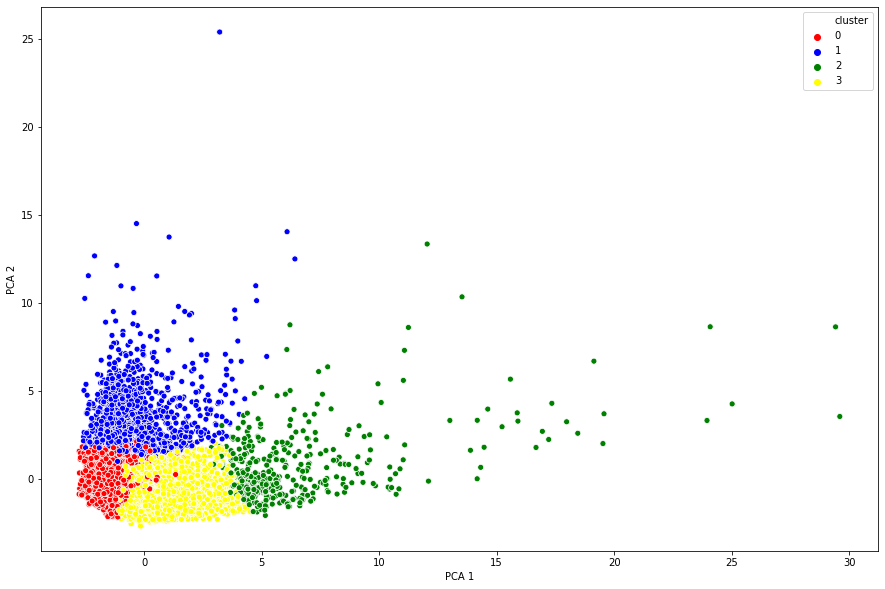

In [64]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x='PCA 1', y='PCA 2', hue="cluster", data=pca_final,palette=['red','blue','green','yellow'])
plt.show()

# Apercu graphique des clusters selon les k-means (3D)

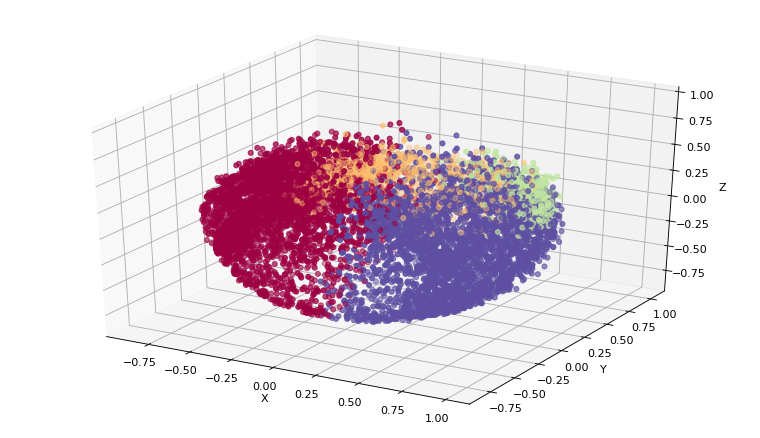

In [65]:
pca = PCA(n_components=3).fit_transform(normalisation_df)
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0], pca.T[1], pca.T[2], c=labels, cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

# Implémentation Modele Gaussien Mixture

In [66]:
from sklearn.mixture import GaussianMixture

# GMM avec normalisation de la base std_data


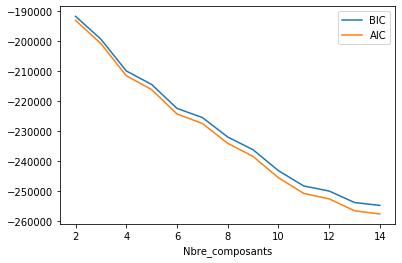

In [67]:
models = [GaussianMixture(n,covariance_type='tied', random_state=123).fit(normalisation_df) for n in range(2,15)]
plt.plot(range(2,15), [m.bic(normalisation_df) for m in models], label='BIC')
plt.plot(range(2,15), [m.aic(normalisation_df) for m in models], label='AIC')
plt.legend()
plt.xlabel('Nbre_composants')
plt.show()

Les différentes courbes sont décroissantes donc on ne peut pas vraiment savoir quelles nbre composants on doit choisir
en effet nbre cluster optimal correspond à la valeur minimum d'une des 2 courbes or 14 semble peu probable (AIC ou BIC)
en effet si on sélectionne 14, là où la courbe BIC/AIC est minimisé on s'expose à un pb de surajustement 

il semble que gmm pas tres performant mais on va creuser pour déterminer bon k en se focalisant sur le bic score et son gradient

Justification sélection n_composants

In [29]:
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [30]:
n_clusters=np.arange(2, 15)
bics=[]
bics_err=[]
iterations=15
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(normalisation_df) 
        
        tmp_bic.append(gmm.bic(normalisation_df))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

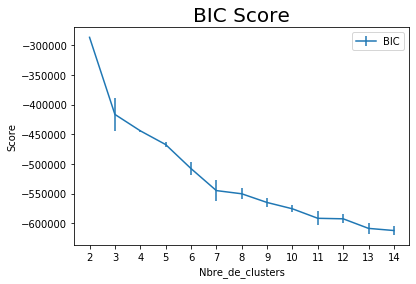

In [31]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Score", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("Nbre_de_clusters")
plt.ylabel("Score")
plt.legend()

Rien de nouveau avec ce graphique, le minimum est toujours atteint au nombre maximum de clusters donc on va s'intéresser à la courbe du gradient bic pour voir si la courbe se stabilise à un autre composant

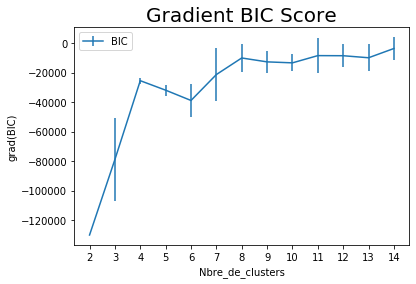

In [32]:
plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC')
plt.title("Gradient BIC Score", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("Nbre_de_clusters")
plt.ylabel("grad(BIC)")
plt.legend()

on voit que à partir de 4-6 clusters la courbe du gradient bic se stabilise donc on peut determiner le bon nombre de k entre 4 et 6 

In [68]:
gmm_cluster=GaussianMixture(n_components=4,covariance_type="spherical",random_state=123)
gmm_cluster.fit(normalisation_df)
gmm_labels = gmm_cluster.predict(normalisation_df)

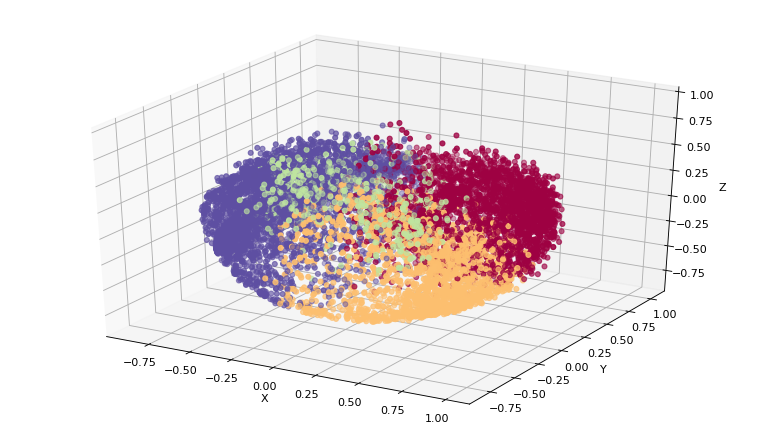

In [69]:
pca = PCA(n_components=3).fit_transform(normalisation_df)
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0], pca.T[1], pca.T[2], c=gmm_labels, cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

In [70]:
df['Clusters']=list(gmm_labels)
clients_gmm=pd.DataFrame(df['Clusters'].value_counts()).rename(columns={'Clusters':'Nbre_de_Clients'})
clients_gmm.T

,3,0,1,2
Nbre_de_Clients,4067,2400,1850,633


Repartition des clients pour les 4 clusters selon la méthode des gmm

In [73]:
df.set_index('Clusters')
grouped=df.groupby(by='Clusters').mean().round(1)

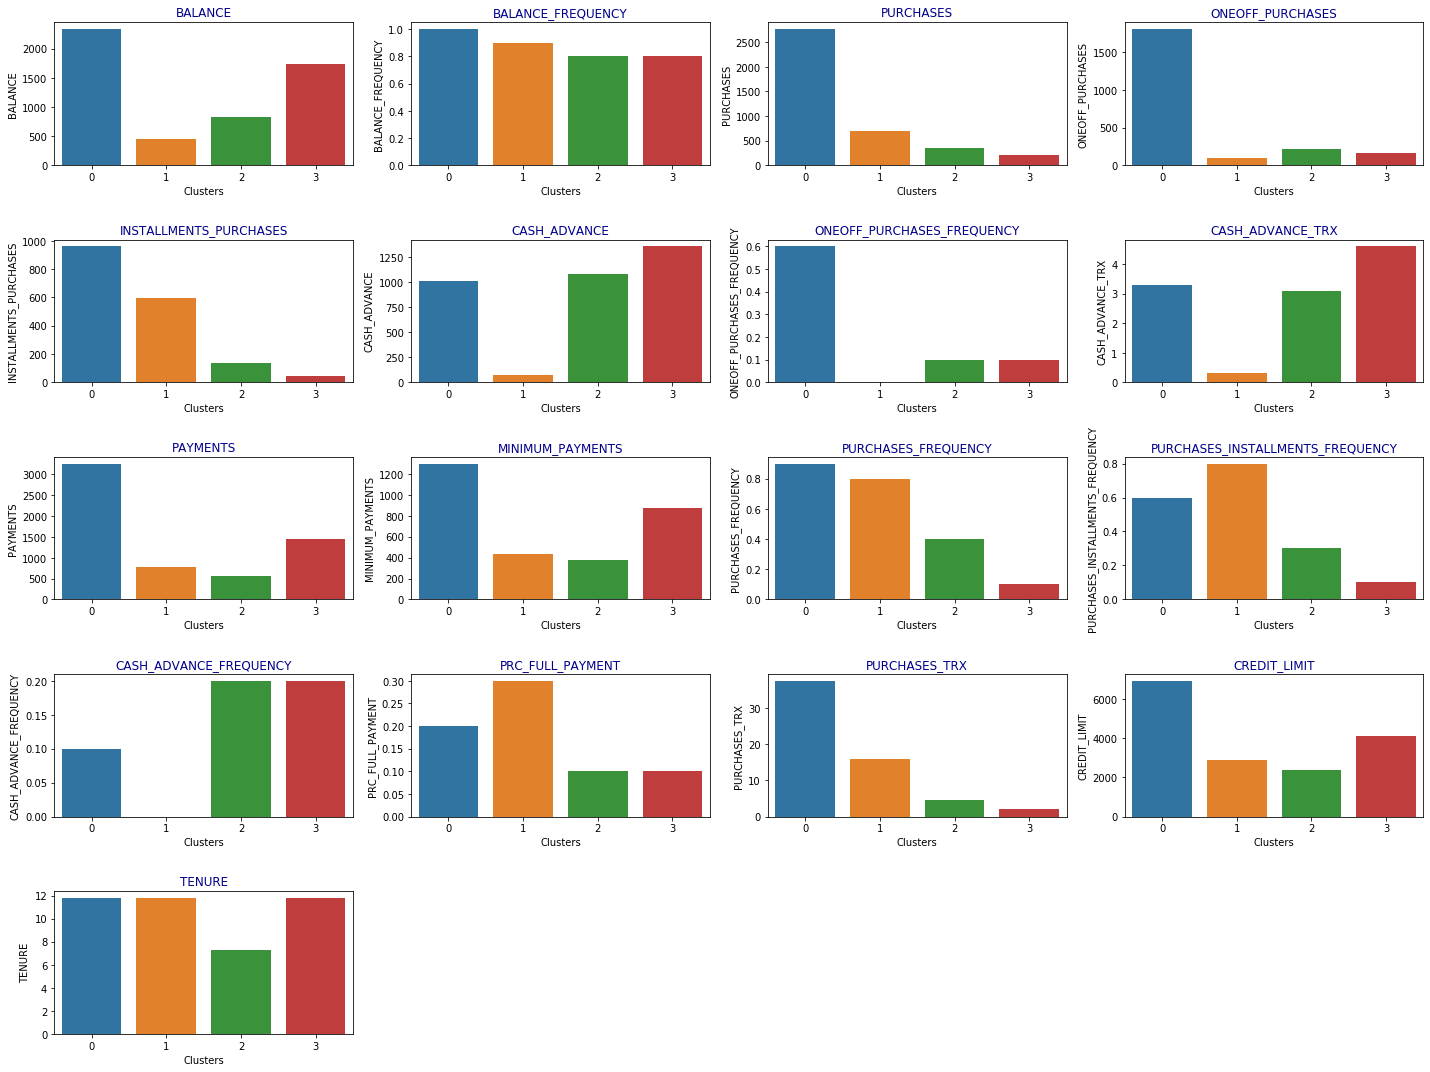

In [74]:
var=["BALANCE","BALANCE_FREQUENCY","PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES",
     "CASH_ADVANCE","ONEOFF_PURCHASES_FREQUENCY","CASH_ADVANCE_TRX","PAYMENTS","MINIMUM_PAYMENTS",
     "PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","CASH_ADVANCE_FREQUENCY","PRC_FULL_PAYMENT",
     "PURCHASES_TRX","CREDIT_LIMIT","TENURE"]
plt.figure(figsize=(20,15))
for i,j in enumerate(var):
    plt.subplot(5,4,i+1)
    sns.barplot(grouped.index,grouped[j])
    plt.title(j,fontdict={'color':'darkblue'})
plt.tight_layout()
plt.show()

# GMM sans normalisation

On remarque les mêmes problemes sur les courbes et le graphique montre aussi un pb dans la data utilisée (non normalisée)

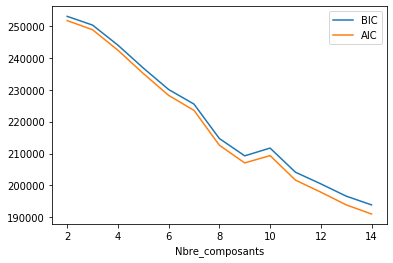

In [75]:
models = [GaussianMixture(n,covariance_type='tied', random_state=123).fit(stand_data) for n in range(2,15)]
plt.plot(range(2,15), [m.bic(stand_data) for m in models], label='BIC')
plt.plot(range(2,15), [m.aic(stand_data) for m in models], label='AIC')
plt.legend()
plt.xlabel('Nbre_composants')
plt.show()

In [76]:
gmm_cluster=GaussianMixture(n_components=4,covariance_type="spherical",random_state=123)
gmm_cluster.fit(stand_data)
gmm_labels = gmm_cluster.predict(stand_data)

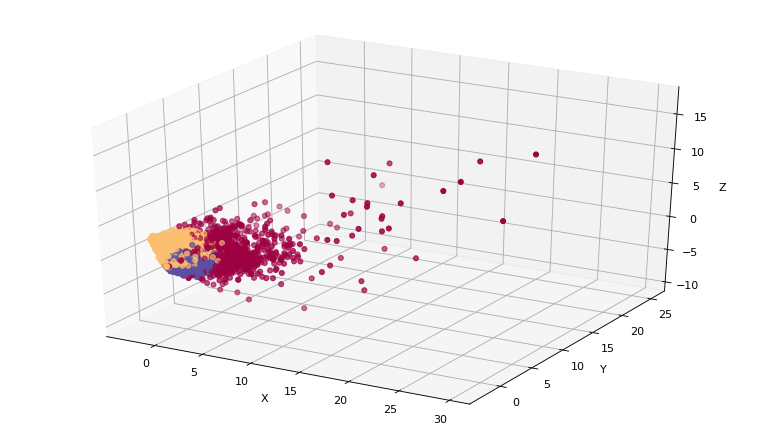

In [77]:
pca = PCA(n_components=4).fit_transform(stand_data)
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0], pca.T[1], pca.T[2], c=gmm_labels, cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

# Implémentation Dendogramme (arbre de décisions)

In [78]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

In [79]:
arbre=linkage(stand_data, method="ward")

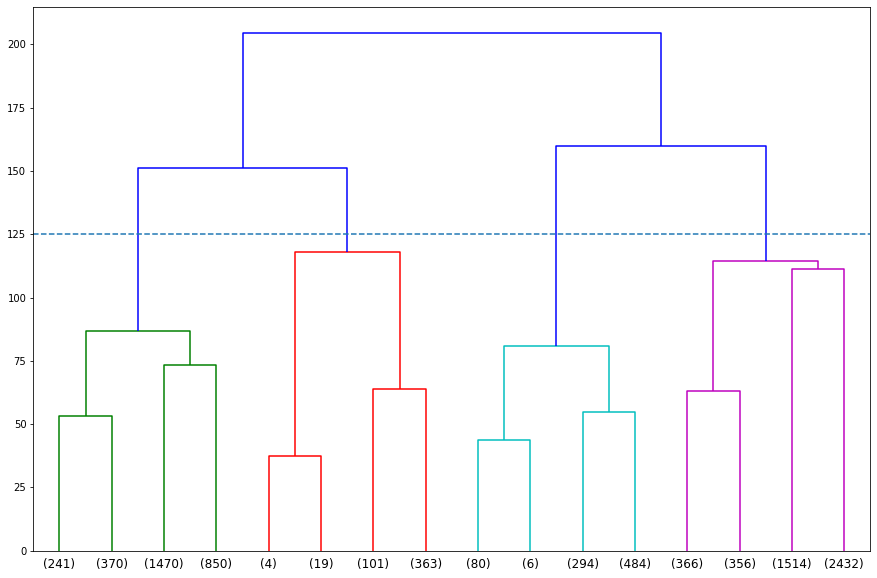

In [80]:
plt.figure(figsize=(15,10))
dendrogram(arbre, p=3, truncate_mode='level')
plt.axhline(y=125, linestyle='--')
plt.show()

In [81]:
model=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')

In [82]:
model.fit(stand_data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4,
                        pooling_func='deprecated')

In [83]:
model.labels_

array([1, 2, 3, ..., 1, 1, 1])

In [84]:
df_arbre=pd.concat([df, pd.DataFrame({'cluster':model.labels_})], axis=1)
df_arbre.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3,1


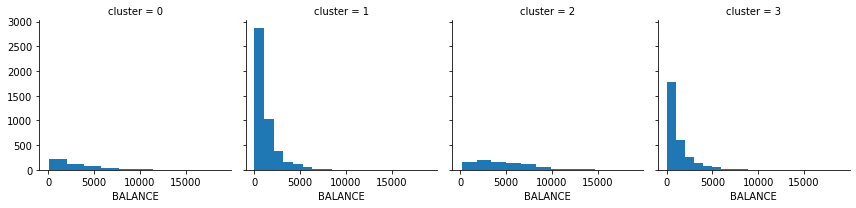

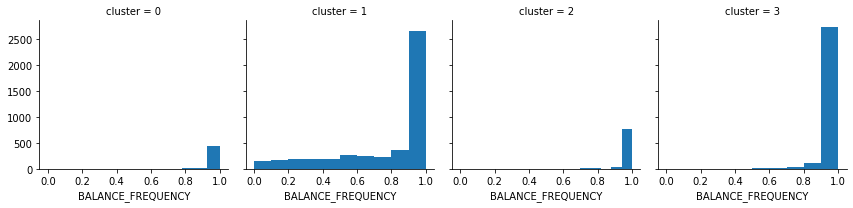

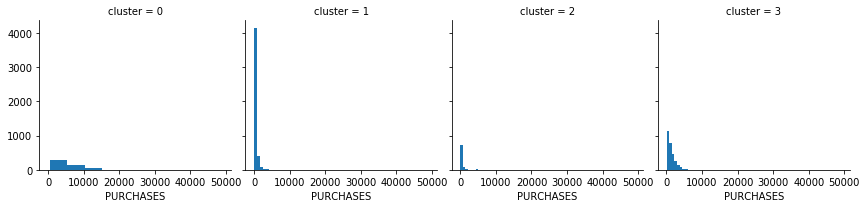

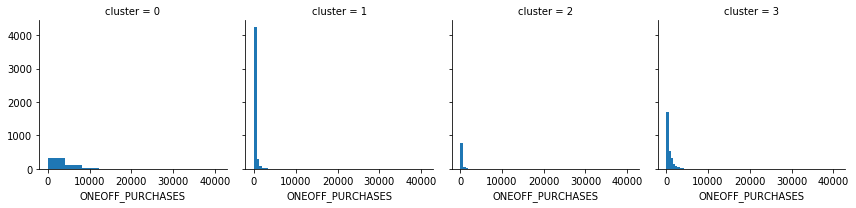

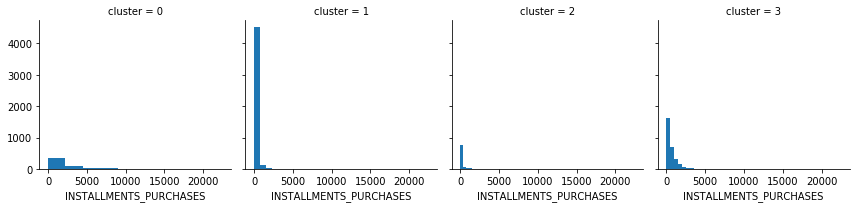

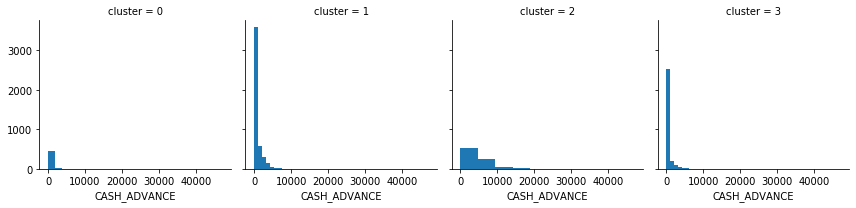

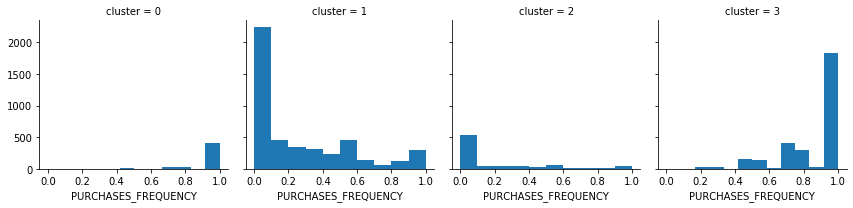

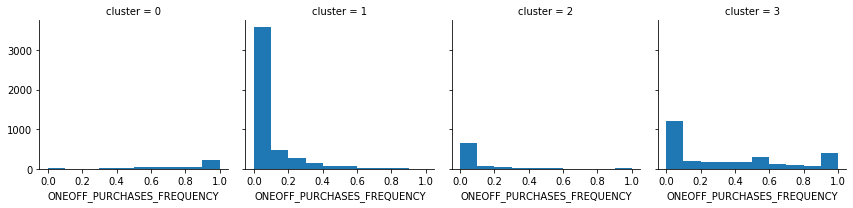

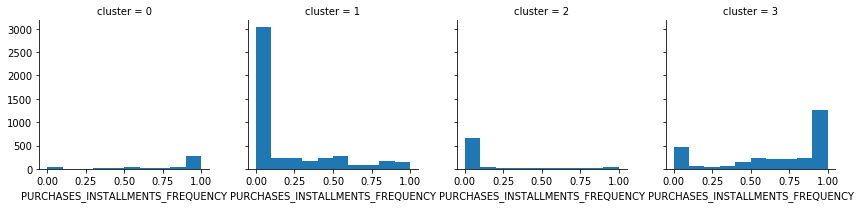

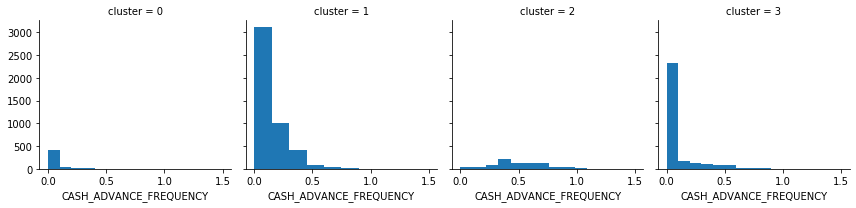

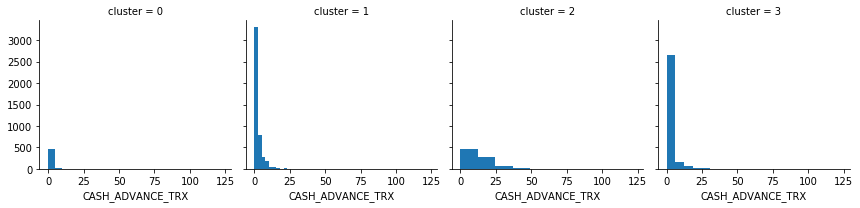

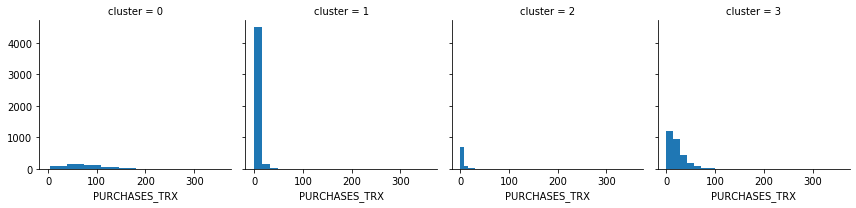

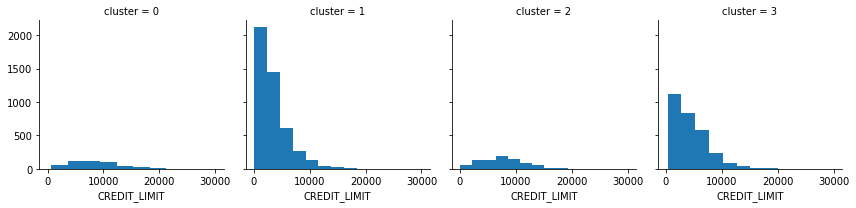

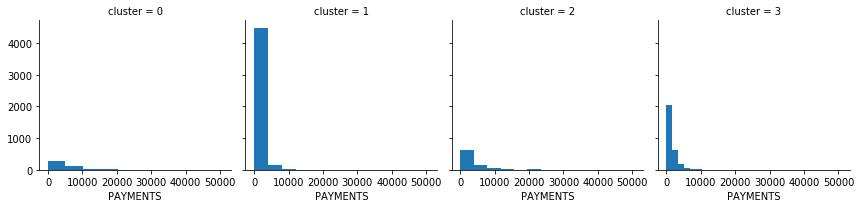

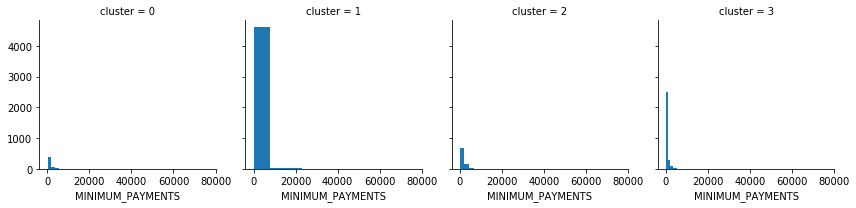

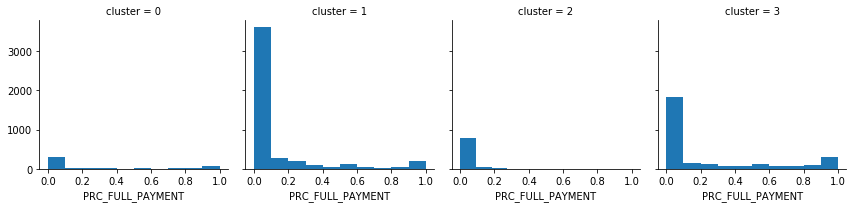

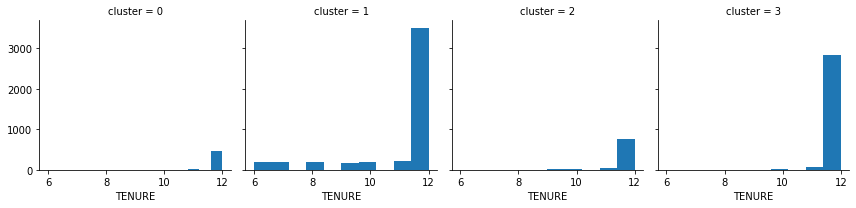

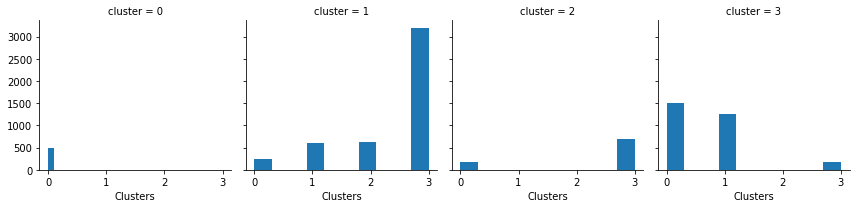

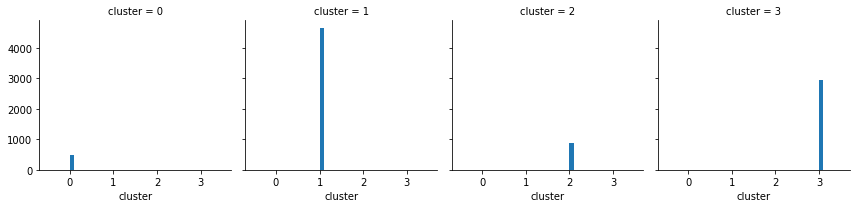

In [86]:
for ab in df_arbre:
    grid= sns.FacetGrid(df_arbre, col='cluster')
    grid.map(plt.hist, ab)

In [87]:
df['Clusters']=list(model.labels_)
client_arbre=pd.DataFrame(df['Clusters'].value_counts()).rename(columns={'Clusters':'Nbre_de_Clients'})
client_arbre.T

,1,3,2,0
Nbre_de_Clients,4668,2931,864,487


In [88]:
df_arbre.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters
cluster,,,,,,,,,,,,,,,,,,
0,3261.592964,0.987867,6703.434969,4494.806448,2209.860554,428.807993,0.944802,0.751209,0.766363,0.054552,1.156057,80.305955,9125.770021,6224.082423,1486.107858,0.266065,11.948665,0.004107
1,1082.617273,0.784368,317.087249,190.795311,126.612072,689.243507,0.258421,0.078436,0.176230,0.113230,2.146958,4.312982,3448.347519,1031.305059,797.629549,0.112448,11.144602,2.458869
2,4733.393046,0.981978,389.403808,264.281863,125.239618,4742.439786,0.204784,0.100882,0.119632,0.495628,15.153935,4.723380,7716.724537,3674.262245,1658.389287,0.031881,11.791667,2.371528
3,1115.777861,0.975988,1329.751709,680.440699,649.478386,422.112009,0.868399,0.338744,0.669564,0.077173,1.842033,23.312863,4441.124655,1532.519529,632.798004,0.236684,11.958376,0.610031


In [89]:
df_pca_arbre = pd.concat([pca_Df, pd.DataFrame({'cluster':model.labels_})], axis = 1)

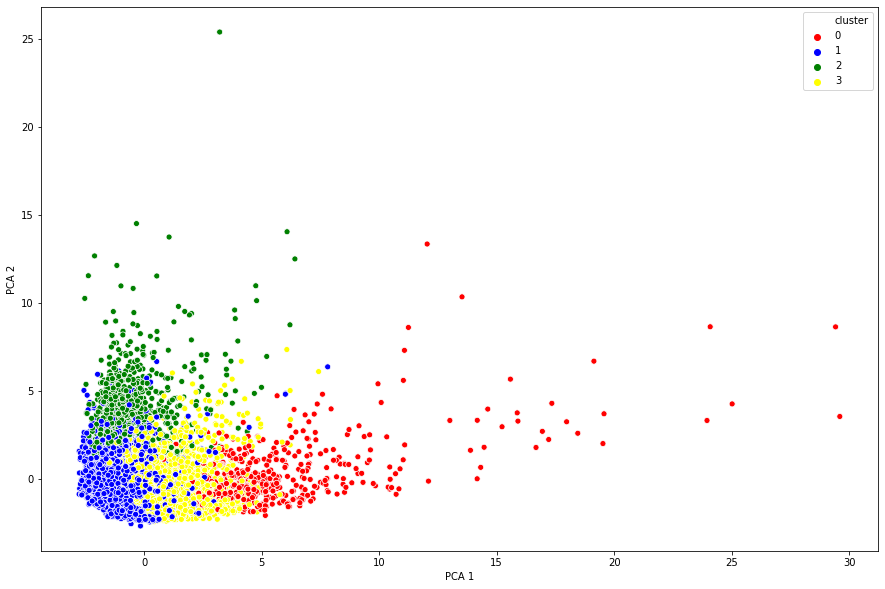

In [90]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x='PCA 1', y='PCA 2', hue="cluster", data=df_pca_arbre,palette=['red','blue','green','yellow'])
plt.show()

pca selon arbre bcp plus bordélique - les points se confondent
donc on semble privilégier pour cette base la méthode des k-means pour faire la classification